In [37]:
'''
In this activity, you are a member of an analytics team that provides insights to an investing firm. 
To help them decide which companies to invest in next, the firm wants insights into 
unicorn companies–companies that are valued at over one billion dollars. 
The data you will use for this task provides information on over 1,000 unicorn companies, 
including their industry, country, year founded, and select investors. 
You will use this information to gain insights into how and when companies reach 
this prestigious milestone and to make recommendations for next steps to the investing firm.
'''

import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt

In [3]:
#load the dataset
companies = pd.read_csv('Unicorn_Companies.csv')

In [ ]:
#inspect the dataframe
companies.head(10)

In [ ]:
companies.info()

In [7]:
#assess the size of the dataframe - how larger is the dataset(number of rows * number of columns)
print(companies.size)

10740


In [8]:
#determine the shape of the dataset - number of rows and columns
print(companies.shape)

(1074, 10)


In [ ]:
# descriptive statistics of the dataset
companies.describe()

In [38]:
#convert the date joined column to datetime
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

#confirm it's changed to datetime data type
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
 10  Year Joined       1074 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 88.2+ KB


In [ ]:
#create a 'Year Joined' column. Extract the year component from the 'Date Joined' column
companies['Year Joined'] = companies['Date Joined'].dt.year
Year_Joined =companies['Year Joined']

#confirm the column has been added
companies.head()

In [53]:
# results and evaluation - Take a sample of the data
companies_sampled = companies.sample(n=50, random_state=50)
companies_sampled

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
680,Bordrin Motors,$1B,2019-06-03,Auto & transportation,Shanghai,China,Asia,2016,$362M,"China Grand Prosperity Investment, CSC Group",2019
678,Yijiupi,$1B,2018-09-20,Consumer & retail,Beijing,China,Asia,2014,$511M,"Source Code Capital, Meituan Dianping, Tencent...",2018
652,Xiaoe Tech,$1B,2021-06-15,Internet software & services,Shenzhen,China,Asia,2015,$149M,"GGV Capital, Hillhouse Capital Management, IDG...",2021
969,Minio,$1B,2022-01-26,Data management & analytics,Palo Alto,United States,North America,2014,$126M,"General Catalyst, Nexus Venture Partners, Dell...",2022
858,Ajaib,$1B,2021-10-04,Fintech,Jakarta,Indonesia,Asia,2018,$245M,"Softbank Ventures Asia, Alpha JWC Ventures, In...",2021
363,Changingedu,$2B,2017-10-30,Edtech,Shanghai,China,Asia,2014,$188M,"Trustbridge Partners, IDG Capital, Sequoia Cap...",2017
926,GO1,$1B,2021-07-19,Internet software & services,Brisbane,Australia,Oceania,2015,$284M,"Y Combinator, M12, SEEK",2021
10,Revolut,$33B,2018-04-26,Fintech,London,United Kingdom,Europe,2015,$2B,"index Ventures, DST Global, Ribbit Capital",2018
909,Esusu,$1B,2022-01-27,Fintech,New York,United States,North America,2015,$145M,"Next Play Ventures, Zeal Capital Partners, Sof...",2022
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017


In [54]:
#prepare data for plotting
#add a column with years difference
companies_sampled['Years till unicorn'] = companies_sampled['Year Joined'] - companies_sampled['Year Founded']
Years_till_unicorn = companies_sampled['Years till unicorn']

#confirm the years difference column has been added
companies_sampled.head()



,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years till unicorn
680,Bordrin Motors,$1B,2019-06-03,Auto & transportation,Shanghai,China,Asia,2016,$362M,"China Grand Prosperity Investment, CSC Group",2019,3
678,Yijiupi,$1B,2018-09-20,Consumer & retail,Beijing,China,Asia,2014,$511M,"Source Code Capital, Meituan Dianping, Tencent...",2018,4
652,Xiaoe Tech,$1B,2021-06-15,Internet software & services,Shenzhen,China,Asia,2015,$149M,"GGV Capital, Hillhouse Capital Management, IDG...",2021,6
969,Minio,$1B,2022-01-26,Data management & analytics,Palo Alto,United States,North America,2014,$126M,"General Catalyst, Nexus Venture Partners, Dell...",2022,8
858,Ajaib,$1B,2021-10-04,Fintech,Jakarta,Indonesia,Asia,2018,$245M,"Softbank Ventures Asia, Alpha JWC Ventures, In...",2021,3


In [57]:
#group the companies by industry. For each industry get the max() value in the `years till unicorn
df = companies_sampled
df = (df[['Industry', 'Years till unicorn']]
        .groupby('Industry')
        .max()
        .sort_values(by='Years till unicorn', ascending=True)
        .head(15)
        .reset_index())
df

,Industry,Years till unicorn
0,Auto & transportation,3
1,Edtech,3
2,Travel,4
3,Artificial intelligence,5
4,Hardware,5
5,Consumer & retail,7
6,"Supply chain, logistics, & delivery",7
7,Data management & analytics,8
8,Fintech,8
9,Health,8


<function matplotlib.pyplot.show(close=None, block=None)>

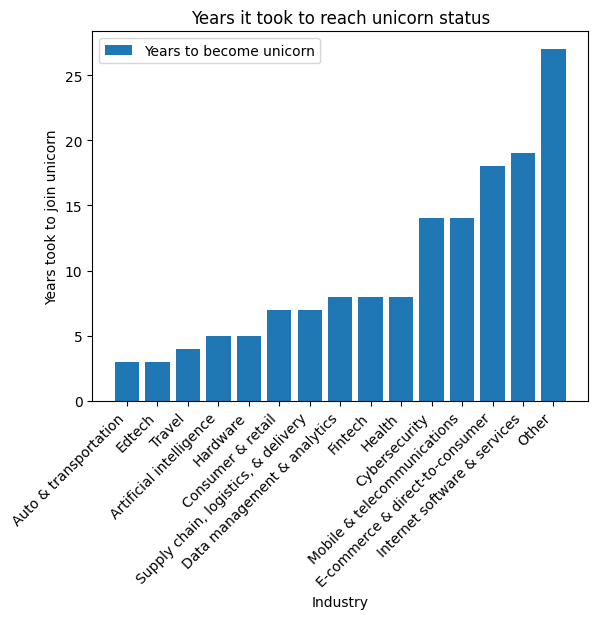

In [79]:
#plotting
# Create bar plot
# with the various industries as the categories of the bars
# and the time it took to reach unicorn status as the height of the bars
plt.bar(x=df['Industry'], height=df['Years till unicorn'], label='Years to become unicorn')
plt.plot()

plt.title('Years it took to reach unicorn status')
plt.xlabel('Industry')
plt.ylabel('Years took to join unicorn')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend()
plt.show


In [ ]:
#plot the maximun unicorn valuation per industry
#create a new column of valuation as an integer data type
companies_sampled['valuation in billion'] = companies_sampled['Valuation']

#remove the '$' sign
companies_sampled['valuation in billion'] = companies_sampled['valuation in billion'].str.replace('$', '')
#remove the 'B' in valuation 
companies_sampled['valuation in billion'] = companies_sampled['valuation in billion'].str.replace('B', '')
#convert column to type int
companies_sampled['valuation in billion'] = companies_sampled['valuation in billion'].astype('int')
companies_sampled.head(10)


In [80]:
#prepare data for modelling
grouped = (companies_sampled[['Industry', 'valuation in billion']]
            .groupby('Industry')
            .max()
            .sort_values(by='valuation in billion')
            )
grouped


,valuation in billion
Industry,
Auto & transportation,1
Consumer & retail,1
Travel,1
Cybersecurity,2
Edtech,2
Health,2
Mobile & telecommunications,2
"Supply chain, logistics, & delivery",2
Artificial intelligence,3


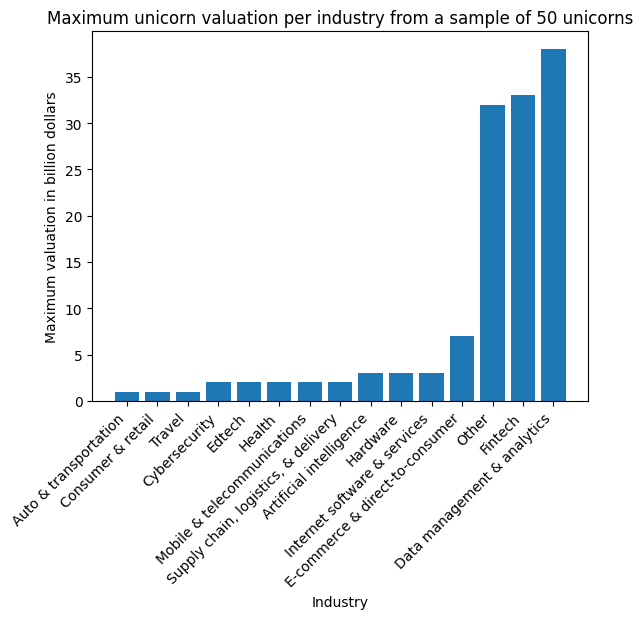

In [81]:
# Create bar plot
# with Industry column as the categories of the bars
# and new valuation column as the heights of the bars

plt.bar(grouped.index, grouped['valuation in billion'])

#set title
plt.title('Maximum unicorn valuation per industry from a sample of 50 unicorns')

#set x axis label
plt.xlabel('Industry')

#set y axis label
plt.ylabel('Maximum valuation in billion dollars')

#rottate labels on the x-axis to avoid overlap in positions of the text
plt.xticks(rotation=45, horizontalalignment='right')

#display the plot
plt.show()

